In [278]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset2.csv')
print(df.to_string())

     Manufacturer           Model     Type  Min.Price  Price  Max.Price  MPG.city  MPG.highway             AirBags DriveTrain Cylinders  EngineSize  Horsepower   RPM  Rev.per.mile Man.trans.avail  Fuel.tank.capacity  Passengers  Length  Wheelbase  Width  Turn.circle  Rear.seat.room  Luggage.room  Weight   Origin                      Make
0           Acura         Integra    Small       12.9   15.9       18.8        25           31                None      Front         4         1.8         140  6300          2890             Yes                13.2           5     177        102     68           37            26.5          11.0    2705  non-USA             Acura Integra
1           Acura          Legend  Midsize       29.2   33.9       38.7        18           25  Driver & Passenger      Front         6         3.2         200  5500          2335             Yes                18.0           5     195        115     71           38            30.0          15.0    3560  non-USA       

<AxesSubplot:>

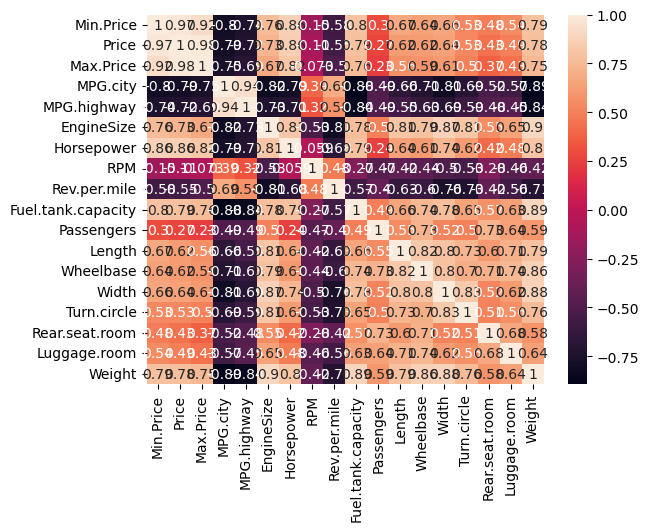

In [279]:
import seaborn as sns
heatmap=df.corr(method='spearman')
heatmap = heatmap.astype(float)  
sns.heatmap(heatmap, annot=True)

In [280]:
df2=df.drop(columns={'Manufacturer','Model','DriveTrain','Type','Origin','Make','AirBags','Min.Price','Max.Price'}, axis=1)
print(df2.to_string())

    Price  MPG.city  MPG.highway Cylinders  EngineSize  Horsepower   RPM  Rev.per.mile Man.trans.avail  Fuel.tank.capacity  Passengers  Length  Wheelbase  Width  Turn.circle  Rear.seat.room  Luggage.room  Weight
0    15.9        25           31         4         1.8         140  6300          2890             Yes                13.2           5     177        102     68           37            26.5          11.0    2705
1    33.9        18           25         6         3.2         200  5500          2335             Yes                18.0           5     195        115     71           38            30.0          15.0    3560
2    29.1        20           26         6         2.8         172  5500          2280             Yes                16.9           5     180        102     67           37            28.0          14.0    3375
3    37.7        19           26         6         2.8         172  5500          2535             Yes                21.1           6     193        10

In [281]:
df2.replace({'Man.trans.avail':{"Yes":1,"No":0}},inplace=True)
df2 = df2[df2.Cylinders != 'rotary']


In [282]:
df2=df2.dropna(axis=0)
df2=df2.astype(float)
print(df2.dtypes)

Price                 float64
MPG.city              float64
MPG.highway           float64
Cylinders             float64
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail       float64
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
dtype: object


In [283]:
import numpy as np

def linear_regression(X, y, lr=0.0001, epochs=1000, regularization=None, alpha=0.1):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X = (X - X_mean) / X_std
    m, n = X.shape
    theta = np.zeros((n, 1))
    for epoch in range(epochs):
        y_pred = X.dot(theta).ravel()  # Reshape y_pred to (m,) to avoid shape mismatch with y
        error = y_pred - y
        if regularization == "L1":
            reg_term = alpha * np.sign(theta)
        elif regularization == "L2":
            reg_term = alpha * theta
        else:
            reg_term = 0
        gradient = (1/m) * X.T.dot(error) + reg_term
        theta -= lr * gradient.reshape((n, 1))  # Reshape gradient to match the shape of theta
    theta[0] -= np.sum(theta[1:])
    theta[1:] -= (X_mean / X_std) * theta[0]
    theta[1:] /= X_std
    return theta.ravel()


In [284]:
X=df2.drop(columns={'Price'}, axis=1)
Y=df2['Price']
X_train = np.array(X)
Y_train = np.array(Y)
print(X_train,Y_train)


[[  25.    31.     4.  ...   26.5   11.  2705. ]
 [  18.    25.     6.  ...   30.    15.  3560. ]
 [  20.    26.     6.  ...   28.    14.  3375. ]
 ...
 [  18.    25.     6.  ...   26.    15.  2810. ]
 [  21.    28.     4.  ...   29.5   14.  2985. ]
 [  20.    28.     5.  ...   30.    15.  3245. ]] [15.9 33.9 29.1 37.7 30.  15.7 20.8 23.7 26.3 34.7 40.1 13.4 11.4 15.1
 15.9 18.8 18.4 15.8 29.5  9.2 11.3 13.3 15.6 25.8 12.2 19.3  7.4 10.1
 11.3 15.9 14.  20.2 20.9  8.4 12.5 19.8 12.1 17.5  8.  10.  10.  13.9
 47.9 28.  35.2 34.3 36.1  8.3 11.6 16.5 31.9 61.9 14.1 14.9 10.3 26.1
 11.8 15.7 21.5 13.5 16.3 20.7 14.4  9.  11.1 17.7 18.5 24.4 28.7 11.1
  8.4 10.9 19.5  8.6  9.8 18.4 18.2  9.1 20.  23.3 22.7 26.7]


In [285]:
result = linear_regression(X_train, Y_train)
print(result)

ValueError: non-broadcastable output operand with shape (16,1) doesn't match the broadcast shape (16,17)